 ### Impurity strongly interacting with a 2D Bose lattice

We can obtain the mean field phase diagram from solving the following equation:
$$2dJ/U = \frac{(n_0 - \mu /U)(\mu /U - n_0 + 1)}{1+\mu/U}$$
With the tip of the lobes found as:
$$
2dJ/U_{\text{max}} = (\sqrt{n_0+1}-\sqrt{n_0})^2 \quad \text{with} \quad \mu/U = \sqrt{n_0(n_0+1) -1}
$$
And we plot the first two Mott lobes.

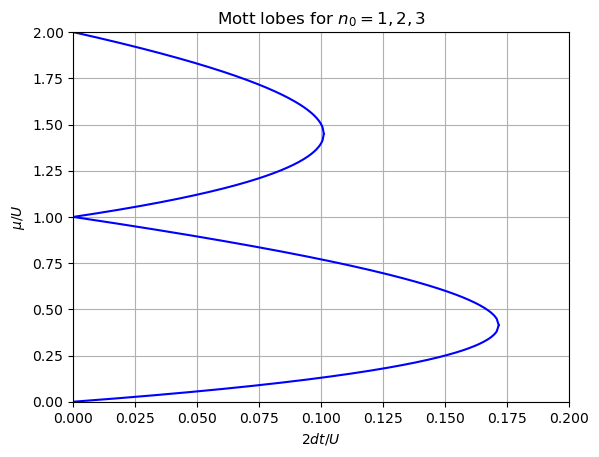

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, solve
muU = symbols('muU')

for n0 in range( 1 , 3 ): # number of lobes in the plot
    dJUmax = (np.sqrt ( n0 + 1 ) - np.sqrt( n0 ) ) ** 2
    dJU1 = np.linspace(0, dJUmax - 1E-9, 200)
    muUs = np.zeros((2, len(dJU1)))
    for i in range(len(dJU1)):
        eqn = (n0 - muU) * (muU - n0 +1) / (1 + muU) - dJU1[i]
        s = solve(eqn, muU)
        muUs[0, i] = s[0]
        muUs[1, i] = s[1]
    # plotting the curves
    plt.plot(dJU1, muUs[0, :], color = 'b')
    plt.plot(dJU1, muUs[1, :], color = 'b')
plt.xlim([0, 0.2])
plt.ylim([0, np.max(muUs)])
plt.grid() 
plt.xlabel(r'$2dt/U$')
plt.ylabel(r'$\mu/U$')
plt.title("Mott lobes for $n_0 = 1, 2, 3$")
plt.show()

Now using the Gutzwiller ansatz, we first compute the ground state energy by solving self-consistently the Gutzwiller equation:
 $$i\dot{c}_n(\bm{r}) = \sum_{m} \bigg\{ \Big[\frac{U}{	2}m(m-1) - \mu m\Big]\delta_{n,m} - 2J\sum_{\langle \bm{s}\rangle}  \Big[\sqrt{n}\delta_{m,n-1} \psi(\bm{s}) + \sqrt{m}\delta_{m,n+1} \psi(\bm{s})^*  
\Big]\bigg\} c_m(\bm{r})$$
And we plot the ground state solution for $\mu/U = 0.8$ and $2dt/U = 0.01,0.05,0.1,0.2,0.3,0.4,0.5$. We find the solution to be more localized in the MI phase.

50


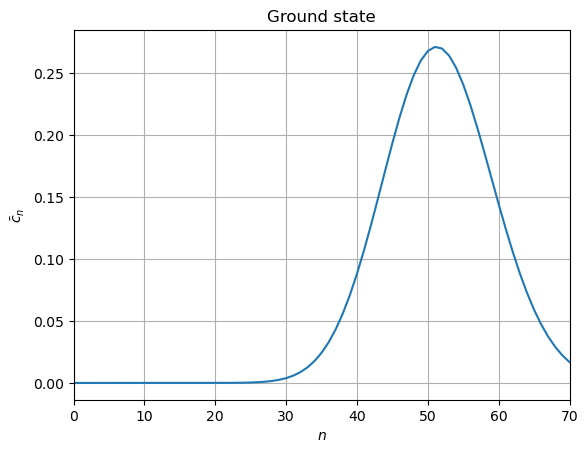

In [33]:
N = 500 # Number of bosons in bosonic fock states

def delta(x, y):
    if x == y:
        return 1
    else:
        return 0

def cn(cns, n):
    if n == -1:
        return 0
    elif n == N:
        return 0
    else:
        return cns[n].real
    
def Psi0(cns):
    Psi0 = 0
    for i in range(1, N):
        Psi0 += np.sqrt(i) * cns[i - 1] * cns[i]
    return Psi0


dJUs = [0.01,0.05,0.1,0.2,0.3,0.4,50]

muU = 1.2

for count in range(6, np.size(dJUs)):

    dJU = dJUs[count]
    print(dJU)

    mat = np.zeros((N, N))

    psi0 = 1

    for k in range(5000):
        for i in range(N):
            for j in range(N):
                mat[i,j] = (0.5 * i * (i - 1) - muU * i ) * delta(i,j) -  dJU * np.sqrt(i) * psi0 * delta(i,j + 1) - dJU * np.sqrt(i + 1) * psi0 * (i + 1 == j)

        Eigvals, Eigvecs = np.linalg.eig(mat)
        ind = np.argmin(Eigvals)
        Eigsorted = np.sort(Eigvals)
        # print(Eigsorted[0], Eigsorted[1], Eigsorted[2],Eigsorted[3], Eigsorted[4], Eigsorted[5], Eigsorted[6], Eigsorted[7], Eigsorted[8], Eigsorted[9])
        cns = np.abs(np.real(Eigvecs[:,ind]))

        psi0 = Psi0(cns)

    n0 = 0
    omega0U = 0

    plt.plot(cns)
plt.grid() 
plt.xlim([0, 70])
plt.xlabel(r'$n$')
plt.ylabel(r'$\bar{c}_n$')
plt.title("Ground state")
plt.show()

Now we add excitations and we solve the following equations:
$$\omega_{\bm{k}} u_{\bm{k},n}
= \sum_{m} (A_{\bm{k}}^{nm} 
u_{\bm{k},m}
+B_{\bm{k}}^{nm} 
v_{\bm{k},m})
$$
$$
\omega_{\bm{k}} v_{\bm{k},n}
=- \sum_{m} (
A_{\bm{k}}^{nm} 
v_{\bm{k},m}
+B_{\bm{k}}^{nm} 
u_{\bm{k},m})$$
with 
$$
A_{\bm{k}}^{nm} = E_m
 \delta_{m,n}
- 2dJ\psi_{0}
\,
[\sqrt{n }
\delta_{m,n-1}
+\sqrt{n+1} \delta_{m,n+1}]
 -  J_{\bm{k}}
 \Big[ \sqrt{n}\sqrt{m}\,
c^0(m-1) c^0(n-1)
\newline + \sqrt{n+1}\sqrt{m+1}  c^0(m+1) c^0(n+1)
\Big],
$$
and
$$
B_{\bm{k}}^{nm}  = - J_{\bm{k}}
\Big[  \sqrt{n}\sqrt{m+1}
c^0(m+1) c^0(n-1)
+  \sqrt{n+1}
 \sqrt{m} c^0(m-1)  c^0(n+1)
 \Big]
 $$

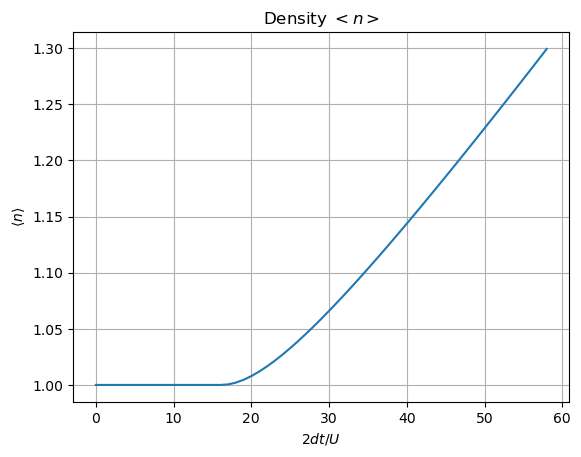

In [13]:
N = 10 # Number of bosons in bosonic fock states
L = 10 # Number of lattice sites in the X and Y directions (Lx = Ly = L)
epsilon = 1e-7

dkx = dky = 2 * np.pi / L

KXs = KYs = np.arange(-np.pi, np.pi, dkx)
dkxs = dkys = np.ones(L) * dkx

# Trapezoidal rule
dkxs[0] = dkxs[L - 1] = dkx / 2
dkys[0] = dkys[L - 1] = dky / 2

dJUs = np.arange(0.01, 0.6, 0.01)
# dJUs = [0.01,0.05,0.1,0.2,0.3,0.4,0.5]
muU = np.sqrt(2) - 1
# muU = 0.8

n0s = np.zeros(len(dJUs))

for count in range(0, len(dJUs)):
    dJU = dJUs[count]
    mat = np.zeros((N, N))

    psi0 = 1

    for k in range(5000):
        for i in range(N):
            for j in range(N):
                mat[i,j] = (0.5 * i * (i - 1) - muU * i) * delta(i,j) -  dJU * np.sqrt(i) * psi0 * delta(i,j + 1) - dJU * np.sqrt(i + 1) * psi0 * (i + 1 == j)

        Eigvals, Eigvecs = np.linalg.eig(mat)
        ind = np.argmin(Eigvals)
        cns = np.abs(np.real(Eigvecs[:,ind]))

        psi0 = Psi0(cns)
    omega0U = 0
    ns = np.arange(0, N, 1)
    n0 =  np.sum(ns * cns * cns)
    omega0U = np.sum( ( 0.5 * ns * (ns - 1) - muU * ns)  * cns * cns)

    n0s[count] = n0
    omega0U = - 2 * dJU * psi0 * psi0 + omega0U
    
plt.plot(n0s)
plt.grid() 
plt.xlabel(r'$2dt/U$')
plt.ylabel(r'$\langle n \rangle$')
plt.title("Density $< n > $")
plt.show()

-0.595 0.00025116477445278224
-0.538182555826547 0.0002271806726867169
-0.3894325558265469 0.00016438947907352133
-0.20556744417345307 8.677529537926092e-05
-0.056817444173453135 2.3984101766065385e-05
0.0 -0.0
-0.056817444173453135 2.3984101766065385e-05
-0.20556744417345307 8.677529537926092e-05
-0.3894325558265469 0.00016438947907352133
-0.538182555826547 0.0002271806726867169
-0.538182555826547 0.0002271806726867169
-0.4813651116530935 0.00020319657092065138
-0.33261511165309376 0.00014040537730745594
-0.14874999999999994 6.279119361319553e-05
1.1102230246251565e-16 -4.68653639617249e-20
0.056817444173453246 -2.3984101766065433e-05
1.1102230246251565e-16 -4.68653639617249e-20
-0.14874999999999994 6.279119361319553e-05
-0.33261511165309376 0.00014040537730745594
-0.4813651116530935 0.00020319657092065138
-0.3894325558265469 0.00016438947907352133
-0.33261511165309376 0.00014040537730745594
-0.18386511165309372 7.761418369426036e-05
0.0 -0.0
0.14875 -6.279119361319556e-05
0.205567444

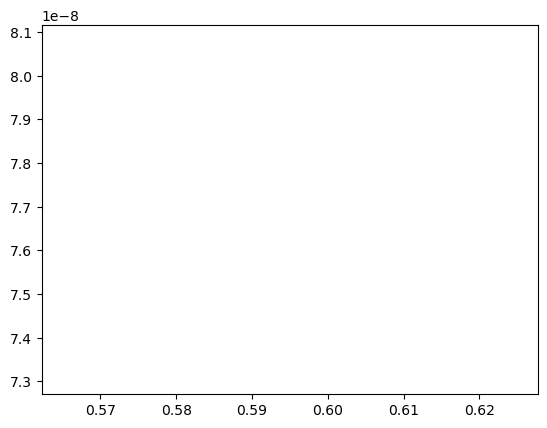

In [43]:
N = 10 # Number of bosons in bosonic fock states
L = 10 # Number of lattice sites in the X and Y directions (Lx = Ly = L)
epsilon = 1e-7
muU = np.sqrt(2) - 1

def JkU(dJU, x):
    return dJU - dJU * x

def epsI(kx, ky):
    return pow(np.sin(kx / 2), 2) + pow(np.sin(ky / 2), 2)

dkx = dky = 2 * np.pi / L

KXs = KYs = np.arange(-np.pi, np.pi, dkx)
dkxs = dkys = np.ones(L) * dkx
# print(KXs)

# Trapezoidal rule
dkxs[0] = dkxs[L - 1] = dkx / 2
dkys[0] = dkys[L - 1] = dky / 2

dJUs = np.arange(0.595, 0.6, 0.05)
muU = np.sqrt(2) - 1


n0s = np.zeros(len(dJUs))
omega0s = np.zeros(len(dJUs))
omega1s = np.zeros(len(dJUs))
omega2s = np.zeros(len(dJUs))

for count in range(len(dJUs)):#(0, len(dJUs)): 
    dJU = dJUs[count]
    mat = np.zeros((N, N))
    A = np.zeros((N, N))
    B = np.zeros((N, N))
    uks = np.zeros((N, L, L, N))
    vks = np.zeros((N, L, L, N))
    omegaklambda = np.zeros((N, L, L))

    psi0 = 1

    for k in range(5000):
        for i in range(N):
            for j in range(N):
                mat[i,j] = (0.5 * i * (i - 1) - muU * i) * delta(i,j) -  dJU * np.sqrt(i) * psi0 * delta(i,j + 1) - dJU * np.sqrt(i + 1) * psi0 * (i + 1 == j)

        Eigvals, Eigvecs = np.linalg.eig(mat)
        ind = np.argmin(Eigvals)
        cns = np.abs(np.real(Eigvecs[:,ind]))

        psi0 = Psi0(cns)
    omega0U = 0
    ns = np.arange(0, N, 1)
    n0 =  np.sum(ns * cns * cns)
    omega0U = np.sum( ( 0.5 * ns * (ns - 1) - muU * ns)  * cns * cns)

    n0s[count] = n0
    omega0U = - 2 * dJU * psi0 * psi0 + omega0U
    omega0s[count] = psi0
    for kx in range(L):
        for ky in range(L):
            x = epsI( KXs[kx], KYs[ky] )
            for n in range(N):
                for m in range(N):
                    A[n,m] = ( 0.5 * n * (n - 1) - muU * n - omega0U) * (n == m) -  JkU(dJU, 0) * psi0 * ( np.sqrt(n) * (n == m + 1) + np.sqrt(m) * (n + 1 == m) )- JkU(dJU, x) * ( np.sqrt(n) * np.sqrt(m) * cn( cns , m - 1 ) * cn( cns , n - 1 ) + np.sqrt(n + 1) * np.sqrt(m + 1) * cn( cns , m + 1 ) * cn( cns , n + 1 ) )
                    B[n,m] = - JkU(dJU, x) * ( np.sqrt(n) * np.sqrt(m + 1) * cn( cns , m + 1 ) * cn( cns , n - 1 ) + np.sqrt(n + 1) * np.sqrt(m) * cn( cns , m - 1 ) * cn( cns , n + 1 ) )
            print( x , B[5][5])
            AB = np.concatenate((A,B), axis=1)
            BA = np.concatenate((-B,-A), axis=1)
            MatAB = np.concatenate((AB,BA), axis=0)
            Eigvals, Eigvecs = np.linalg.eig(MatAB)
            # sort the positive eigenvalues

            omega00 = np.sort(Eigvals)
            omega0 = omega00[ N : 2 * N ]
            # print(omega0)
            for lambda_ in range(N - 1):
                omegaklambda[lambda_][kx][ky]= np.real( omega0[lambda_] )
                #print(omegaklambda[lambda_][kx][ky])
                doublezero = False
                if (lambda_ == 0):
                    ind = np.where(np.floor(10 * np.abs(np.real(Eigvals))) == np.floor(10 * np.abs(omega0[lambda_])) )

                    if (ind[0].size > 2):
                        doublezero = True

                    for n in range(N):
                        uks[n][kx][ky][lambda_] = cns[n]
                        vks[n][kx][ky][lambda_] = 0
                    omegaklambda[lambda_][kx][ky] = 0

                else:
                    ind = np.where(Eigvals == omega0[lambda_])
                    #print(omega0[lambda_])
                    ind1 = ind[0][0]
                    #print(ind1)
                    if (ind[0].size > 1):
                        ind1 = ind[0][1]
                    Norm = 0
                    Norm = sum( np.real(Eigvecs[0 : N - 1, ind1]) * np.real(Eigvecs[0 : N - 1, ind1] )) - sum(  np.real(Eigvecs[N : 2 * N - 1, ind1]) * np.real(Eigvecs[N : 2 * N - 1, ind1]) )
                    # if(lambda_ == 8):
                    #     print(Eigvecs[0 : 2 * N - 1, ind1])
                    if (round(Norm,6) <= 0):
                        # print(dJU, kx, ky, lambda_, Norm, omegaklambda[lambda_][kx][ky])
                        # print(Eigvecs[0 : 2 * N - 1, ind1])
                        Norm = 1
                    uks[:][kx][ky][lambda_] = np.real(Eigvecs[0 : N, ind1]) / np.sqrt(Norm)
                    vks[:][kx][ky][lambda_] = np.real(Eigvecs[N : 2 * N, ind1]) / np.sqrt(Norm)
                    
        
        omega0s[count] = omegaklambda[1][5][5]
        omega1s[count] = omegaklambda[2][5][5]
        omega2s[count] = omegaklambda[3][5][5]

plt.plot(dJUs, omega0s)
# plt.plot(dJUs, omega1s)
# plt.plot(dJUs, omega2s)
plt.show()

[-3.14159265 -2.44346095 -1.74532925 -1.04719755 -0.34906585  0.34906585
  1.04719755  1.74532925  2.44346095  3.14159265]
dJU =  0.001 muU =  0.41421356237309515
sig0 =  0.2  sig1 =  0.0  sig2 =  -1.5980383763947333e-07
dJU =  0.006 muU =  0.41421356237309515
sig0 =  0.2  sig1 =  0.0  sig2 =  -5.721741827916143e-06
dJU =  0.011 muU =  0.41421356237309515
sig0 =  0.2  sig1 =  0.0  sig2 =  -1.9149314136103868e-05
dJU =  0.016 muU =  0.41421356237309515
sig0 =  0.2  sig1 =  0.0  sig2 =  -4.0388180752986194e-05
dJU =  0.021 muU =  0.41421356237309515
sig0 =  0.2  sig1 =  0.0  sig2 =  -6.943948725563327e-05
dJU =  0.026000000000000002 muU =  0.41421356237309515
sig0 =  0.2  sig1 =  0.0  sig2 =  -0.00010636041506473168
dJU =  0.031 muU =  0.41421356237309515
sig0 =  0.2  sig1 =  0.0  sig2 =  -0.0001512657839352482
dJU =  0.036000000000000004 muU =  0.41421356237309515
sig0 =  0.2  sig1 =  0.0  sig2 =  -0.00020433078393441789
dJU =  0.041 muU =  0.41421356237309515
sig0 =  0.2  sig1 =  0.0  

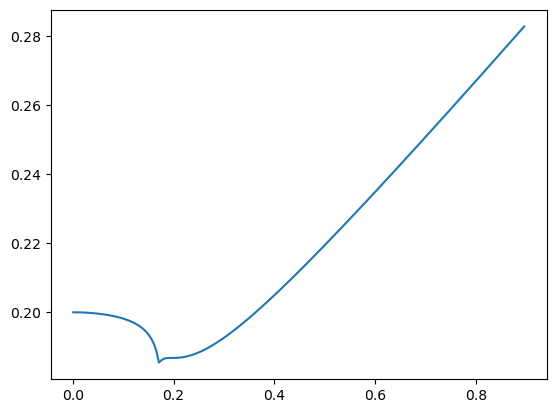

In [5]:

def U(kx, ky, lambda_, qx, qy, lambda1, uks, n0):
    Ures = 0
    ns = np.arange(0, N, 1)
    Ures = sum((ns - n0 * (1 - delta(lambda_, lambda1) * delta(lambda_, 0))) * uks[:][kx][ky][lambda_] * uks[:][qx][qy][lambda1])
    return Ures

def V(kx, ky, lambda_, qx, qy, lambda1, vks, n0):
    Vres = 0
    ns = np.arange(0, N, 1)
    Vres = sum((ns - n0) * vks[:, kx, ky, lambda_] * vks[:, qx, qy, lambda1])
    return Vres

def W(kx, ky, lambda_, qx, qy, lambda1, uks, vks, n0):
    Wres = 0
    ns = np.arange(0, N, 1)
    Wres = sum((ns - n0) * uks[:, kx, ky, lambda_] * vks[:, qx, qy, lambda1] + (ns - n0) * uks[:, qx, qy, lambda1] * vks[:, kx, ky, lambda_])
    return Wres

def Nk(kx, ky, lambda_, cns, uks, vks):
    Nkres = 0
    ns = np.arange(0, N, 1)
    for i in range(N):
        Nkres = Nkres + ns[i] * cns[i] * (uks[i, kx, ky, lambda_] + vks[i, kx, ky, lambda_])
    return Nkres

N = 10 # Number of bosons in bosonic fock states
L = 9 # Number of lattice sites in the X and Y directions (Lx = Ly = L)
epsilon = 1e-7

cutoff = 7

dkx = dky = 2 * np.pi / L

KXs = KYs = np.arange(-np.pi, np.pi + dkx, dkx)
dkxs = dkys = np.ones(L + 1) * dkx
# print(KXs)

# Trapezoidal rule
dkxs[0] = dkxs[ L ] = dkx / 2
dkys[0] = dkys[ L ] = dky / 2
print(KXs)

dJUs = np.arange(0.001, 0.9, 0.005)
muU = np.sqrt(2) - 1
UIB = 0.2

n0s = np.zeros(len(dJUs))
omega0s, omega1s, omega2s = np.zeros(len(dJUs)), np.zeros(len(dJUs)), np.zeros(len(dJUs))
sigma0s, sigma1s, sigma2s = np.zeros(len(dJUs)), np.zeros(len(dJUs)), np.zeros(len(dJUs))

for count in range( len(dJUs) ): #
    dJU = dJUs[count]
    mat = np.zeros( ( N , N ) )
    A = np.zeros( ( N , N ) )
    B = np.zeros( ( N , N ) )
    uks = np.zeros( ( N , L + 1, L + 1 , N ) )
    vks = np.zeros( ( N , L + 1, L + 1 , N ) )
    omegaklambda = np.zeros( ( N , L + 1 , L + 1 ) )

    psi0 = 1

    for k in range( 50000 ):
        for i in range( N ):
            for j in range( N ):
                mat[i,j] = (0.5 * i * (i - 1) - muU * i) * delta( i , j ) -  dJU * np.sqrt(i) * psi0 * delta( i , j + 1) - dJU * np.sqrt(i + 1) * psi0 * delta( i + 1, j ) 
                # print(dJU ,  mat[i,j])

        Eigvals, Eigvecs = np.linalg.eig(mat)
        ind = np.argmin(Eigvals)
        cns = np.abs( np.real( Eigvecs [ : , ind ] ) )

        psi0 = Psi0(cns)
    omega0U = 0
    ns = np.arange(0, N, 1)
    n0 =  np.sum(ns * cns * cns)
    omega0U = np.sum( ( 0.5 * ns * (ns - 1) - muU * ns)  * cns * cns)
    n0s[count] = n0
    omega0U = - 2 * dJU * psi0 * psi0 + omega0U


    for kx in range(L + 1):
        for ky in range(L + 1):
            x = epsI( KXs[ kx ], KYs[ ky ] )
            for n in range(N):
                for m in range(N):
                    A[ n , m ] = ( 0.5 * n * (n - 1) - muU * n - omega0U) * (n == m) -  JkU(dJU, 0) * psi0 * ( np.sqrt(n) * (n == m + 1) + np.sqrt(m) * (n + 1 == m) )- JkU(dJU, x) * ( np.sqrt(n) * np.sqrt(m) * cn( cns , m - 1 ) * cn( cns , n - 1 ) + np.sqrt(n + 1) * np.sqrt(m + 1) * cn( cns , m + 1 ) * cn( cns , n + 1 ) )
                    B[ n , m ] = - JkU(dJU, x) * ( np.sqrt(n) * np.sqrt(m + 1) * cn( cns , m + 1 ) * cn( cns , n - 1 ) + np.sqrt(n + 1) * np.sqrt(m) * cn( cns , m - 1 ) * cn( cns , n + 1 ) )

            AB = np.concatenate( ( A , B ) , axis = 1 )
            BA = np.concatenate( ( - B , - A ) , axis = 1)
            MatAB = np.concatenate( ( AB , BA ) , axis = 0 )
            Eigvals, Eigvecs = np.linalg.eig( MatAB )

            # sort the positive eigenvalues
            omega00 = np.sort(Eigvals)
            omega0 = omega00[ N : 2 * N ]

            for lambda_ in range(N - 1):
                omegaklambda[lambda_ , kx , ky]= np.real( omega0[lambda_] )
                #print(omegaklambda[lambda_][kx][ky])
                doublezero = False
                if (lambda_ == 0):
                    ind = np.where(np.floor(10 * np.abs(np.real(Eigvals))) == np.floor(10 * np.abs(omega0[lambda_])) )

                    if (ind[0].size > 2):
                        doublezero = True

                    for n in range(N):
                        uks[n , kx , ky , lambda_] = cns[n]
                        vks[n , kx , ky , lambda_] = 0
                    omegaklambda[lambda_ , kx , ky] = 0

                else:
                    ind = np.where(Eigvals == omega0[lambda_])
                    ind1 = ind[0][0]
                    if (ind[0].size > 1):
                        ind1 = ind[0][1]
                    Norm = 0
                    Norm = sum( np.real( Eigvecs[ 0 : N - 1, ind1 ] ) * np.real( Eigvecs[0 : N - 1, ind1] ) ) - sum(  np.real( Eigvecs[ N : 2 * N - 1, ind1]) * np.real(Eigvecs[N : 2 * N - 1, ind1]) )
                    if (round(Norm,6) <= 0):
                        Norm = 1
                    uks[: , kx , ky , lambda_] = np.real(Eigvecs[ 0 : N , ind1]) / np.sqrt(Norm)
                    vks[: , kx , ky , lambda_] = np.real(Eigvecs[ N : 2 * N , ind1]) / np.sqrt(Norm)

    # Sigma0 zeroth term of self energy
    print("dJU = ", dJU, "muU = ", muU)
    deltan2 = 0
    Sigma1, Sigma2 = 0 , 0
    res = 0
    for lambda_ in range(1, cutoff):
        for kx in range(L + 1):
            for ky in range(L + 1):
                deltan2 = deltan2 + 1.0 / (4 * np.pi * np.pi) * dkxs[kx] * dkys[ky] * V(kx, ky, lambda_, kx, ky, lambda_, vks, n0)

                # Sigma1 first term of self energy
                Nkres = Nk(kx, ky, lambda_, cns, uks, vks)
                res = np.real( pow( UIB / ( 2 * np.pi ) , 2 ) * dkxs[kx] * dkys[ky] * abs(pow(Nkres, 2)) / ( - omegaklambda[lambda_ , kx , ky] - dJU * epsI(KXs[kx], KYs[ky]) + 1j * 0.0001))
                Sigma1 = Sigma1 + res

                # Sigma1 first term of self energy
                for lambda_1 in range(1, cutoff):
                    for px in range(L + 1):
                        for py in range(L + 1):
                            W1 = W(kx, ky, lambda_, px, py, lambda_1, uks, vks, n0)
                            W2 = W(px, py, lambda_1, kx, ky, lambda_, uks, vks, n0)
                            Sigma2 = Sigma2 + np.real(pow(UIB, 2) / (2 * pow(2 * np.pi,4) ) * (dkxs[kx] * dkys[ky] * dkxs[px] * dkys[py]) * abs(pow(W1 + W2, 2)) / (-omegaklambda[lambda_ , kx , ky] - omegaklambda[lambda_1 , px , py] - dJU * epsI(KXs[kx] + KXs[px], KYs[ky] + KYs[py]) + 1j * 0.0001))

    sigma0s[count] = UIB * (n0 + deltan2)

    sigma1s[count] = np.real(Sigma1)

    sigma2s[count] = np.real(Sigma2)

    print("sig0 = ", sigma0s[count], " sig1 = ", sigma1s[count], " sig2 = ", sigma2s[count])

plt.plot(dJUs, sigma0s + sigma1s + sigma2s )
plt.show()

In [6]:
def U(kx, ky, lambda_, qx, qy, lambda1, uks, n0, count):
    Ures = 0
    ns = np.arange(0, N, 1)
    Ures = sum((ns - n0 * (1 - delta(lambda_, lambda1) * delta(lambda_, 0))) * uks[ : , kx , ky , lambda_ , count] * uks[: , qx , qy , lambda1 , count])
    return Ures

def V(kx, ky, lambda_, qx, qy, lambda1, vks, n0, count):
    Vres = 0
    ns = np.arange(0, N, 1)
    Vres = sum((ns - n0) * vks[:, kx, ky, lambda_, count] * vks[:, qx, qy, lambda1, count])
    return Vres

def W(kx, ky, lambda_, qx, qy, lambda1, uks, vks, n0, count):
    Wres = 0
    ns = np.arange(0, N, 1)
    Wres = sum((ns - n0) * uks[:, kx, ky, lambda_,count] * vks[:, qx, qy, lambda1,count] + (ns - n0) * uks[:, qx, qy, lambda1, count] * vks[:, kx, ky, lambda_,count])
    return Wres

def Nk(kx, ky, lambda_, cns, uks, vks, count):
    Nkres = 0
    ns = np.arange(0, N, 1)
    for i in range(N):
        Nkres = Nkres + ns[i] * cns[i] * (uks[i, kx, ky, lambda_,count] + vks[i, kx, ky, lambda_,count])
    return Nkres

In [7]:
x = np.array([13, 2, 3, 5, 6, 10, 9, 8, 1, 4, 7])
print(sorted(x))
np.argsort(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13]


array([ 8,  1,  2,  9,  3,  4, 10,  7,  6,  5,  0])

In [8]:
N = 10 # Number of bosons in bosonic fock states
L = 10 # Number of lattice sites in the X and Y directions (Lx = Ly = L)
epsilon = 1e-7

cutoff = 7

dkx = dky = 2 * np.pi / L

KXs = KYs = np.arange(-np.pi, np.pi + dkx, dkx)
dkxs = dkys = np.ones(L + 1) * dkx
# print(KXs)

# Trapezoidal rule
dkxs[0] = dkxs[ L ] = dkx / 2
dkys[0] = dkys[ L ] = dky / 2
#print(KXs)

dJUs = np.arange(0.001, 0.9, 0.01)
muU = np.sqrt(2) - 1
UIB = 0.2

M = len(dJUs)
n0s = np.zeros(M)
omega0s, omega1s, omega2s = np.zeros(M), np.zeros(M), np.zeros(M)
sigma0s, sigma1s, sigma2s = np.zeros(M), np.zeros(M), np.zeros(M)
uks = vks = np.zeros( ( N , L + 1, L + 1 , N , M ) )
omegaklambda = np.zeros( ( N , L + 1 , L + 1 , M ) )

for count in range( len(dJUs) ): #
    dJU = dJUs[count]
    mat = np.zeros( ( N , N ) )
    A = np.zeros( ( N , N ) )
    B = np.zeros( ( N , N ) )

    psi0 = 1

    for k in range( 5000 ):
        for i in range( N ):
            for j in range( N ):
                mat[i,j] = (0.5 * i * (i - 1) - muU * i) * delta( i , j ) -  dJU * np.sqrt(i) * psi0 * delta( i , j + 1) - dJU * np.sqrt(i + 1) * psi0 * delta( i + 1, j ) 
                # print(dJU ,  mat[i,j])

        Eigvals, Eigvecs = np.linalg.eig(mat)
        ind = np.argmin(Eigvals)
        cns = np.abs( np.real( Eigvecs [ : , ind ] ) )

        psi0 = Psi0(cns)
    omega0U = 0
    ns = np.arange(0, N, 1)
    n0 =  np.sum(ns * cns * cns)
    omega0U = np.sum( ( 0.5 * ns * (ns - 1) - muU * ns)  * cns * cns)
    n0s[count] = n0
    omega0U = - 2 * dJU * psi0 * psi0 + omega0U


    for kx in range(L + 1):
        for ky in range(L + 1):
            x = epsI( KXs[ kx ], KYs[ ky ] )
            for n in range(N):
                for m in range(N):
                    A[ n , m ] = ( 0.5 * n * (n - 1) - muU * n - omega0U) * (n == m) -  JkU(dJU, 0) * psi0 * ( np.sqrt(n) * (n == m + 1) + np.sqrt(m) * (n + 1 == m) )- JkU(dJU, x) * ( np.sqrt(n) * np.sqrt(m) * cn( cns , m - 1 ) * cn( cns , n - 1 ) + np.sqrt(n + 1) * np.sqrt(m + 1) * cn( cns , m + 1 ) * cn( cns , n + 1 ) )
                    B[ n , m ] = - JkU(dJU, x) * ( np.sqrt(n) * np.sqrt(m + 1) * cn( cns , m + 1 ) * cn( cns , n - 1 ) + np.sqrt(n + 1) * np.sqrt(m) * cn( cns , m - 1 ) * cn( cns , n + 1 ) )

            AB = np.concatenate( ( A , B ) , axis = 1 )
            BA = np.concatenate( ( - B , - A ) , axis = 1)
            MatAB = np.concatenate( ( AB , BA ) , axis = 0 )
            Eigvals, Eigvecs = np.linalg.eig( MatAB )
            Eigvals = np.real(Eigvals)
            Eigvecs = np.real(Eigvecs)
            # sort the positive eigenvalues
            omega00 = np.sort(Eigvals)
            omega0 = omega00[ N : 2 * N ]

            # if kx == 5 and ky == 5:
            #     print(dJU, omega0[0], omega0[1], omega0[2])

            inds = np.argsort(Eigvals)
            inds = inds[ N : 2 * N ]

            for lambda_ in range(N - 1):
                ind = inds[lambda_]
                omegaklambda[lambda_ , kx , ky, count] = np.real( omega0[lambda_] )

                # norm1 = np.linalg.norm(np.real(Eigvecs[0:N-1, ind1]))
                # norm2 = np.linalg.norm(np.real(Eigvecs[N:2*N-1, ind1]))
                # Norm = norm1**2 - norm2**2
                # print(Norm)
                # if (round(Norm , 6) <= 0):
                #     Norm = 1
                uks[: , kx , ky , lambda_, count] = Eigvecs[ 0 : N , ind].ravel() #/ np.sqrt(Norm)

                vks[: , kx , ky , lambda_, count] = np.real(Eigvecs[ N : 2 * N , ind]).ravel() #/ np.sqrt(Norm)

dJU =  0.001 muU =  0.41421356237309515 sig0 =  0.2  sig1 =  -2.97811997428274e-07  sig2 =  -1.6468594477082204e-13
dJU =  0.011 muU =  0.41421356237309515 sig0 =  0.2  sig1 =  -3.538817368801929e-05  sig2 =  -2.399526385649383e-09
dJU =  0.020999999999999998 muU =  0.41421356237309515 sig0 =  0.2  sig1 =  -0.00012788779129423343  sig2 =  -3.2028927862293346e-08
dJU =  0.030999999999999996 muU =  0.41421356237309515 sig0 =  0.2  sig1 =  -0.0002788929449322285  sig2 =  -1.5435311761976324e-07
dJU =  0.040999999999999995 muU =  0.41421356237309515 sig0 =  0.2  sig1 =  -0.0004925974771003342  sig2 =  -4.841946401594038e-07
dJU =  0.05099999999999999 muU =  0.41421356237309515 sig0 =  0.2  sig1 =  -0.0007764293080467623  sig2 =  -1.2010378362590992e-06
dJU =  0.06099999999999999 muU =  0.41421356237309515 sig0 =  0.2  sig1 =  -0.0011415278858960436  sig2 =  -2.5749954297889372e-06
dJU =  0.071 muU =  0.41421356237309515 sig0 =  0.2  sig1 =  -0.0016036398161525225  sig2 =  -5.00885716451816

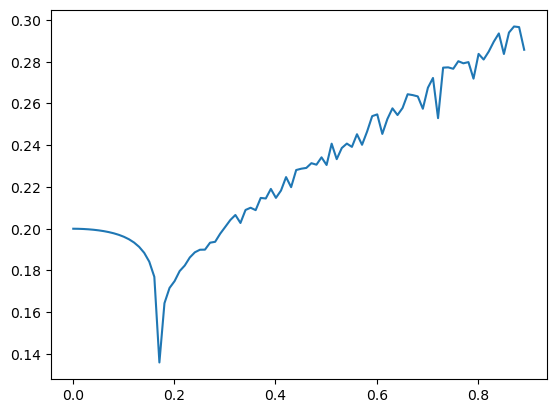

In [9]:
for count in range( len(dJUs) ): #    
    dJU = dJUs[count]
    n0 = n0s[count]
    # print("dJU = ", dJUs[count], "muU = ", muU)
    deltan2 = 0
    Sigma1, Sigma2 = 0 , 0
    res = 0
    for lambda_ in range(1, cutoff):
        for kx in range(L + 1):
            for ky in range(L + 1):
                # Sigma0 zeroth term of self energy
                deltan2 = deltan2 + 1.0 / (4 * np.pi * np.pi) * dkxs[kx] * dkys[ky] * V(kx, ky, lambda_, kx, ky, lambda_, vks, n0, count)

                # Sigma1 first term of self energy
                Nkres = Nk(kx, ky, lambda_, cns, uks, vks , count)
                res = np.real( pow( UIB / ( 2 * np.pi ) , 2 ) * dkxs[kx] * dkys[ky] * abs(pow(Nkres, 2)) / ( - omegaklambda[lambda_ , kx , ky, count] - dJU * epsI(KXs[kx], KYs[ky]) + 1j * 0.0001))
                Sigma1 = Sigma1 + res

                # Sigma1 first term of self energy
                for lambda_1 in range(1, cutoff):
                    for px in range(L + 1):
                        for py in range(L + 1):
                            W1 = W(kx, ky, lambda_, px, py, lambda_1, uks, vks, n0, count)
                            W2 = W(px, py, lambda_1, kx, ky, lambda_, uks, vks, n0, count)
                            Sigma2 = Sigma2 + np.real(pow(UIB, 2) / (2 * pow(2 * np.pi,4) ) * (dkxs[kx] * dkys[ky] * dkxs[px] * dkys[py]) * abs(pow(W1 + W2, 2)) / (-omegaklambda[lambda_ , kx , ky, count] - omegaklambda[lambda_1 , px , py, count] - dJU * epsI(KXs[kx] + KXs[px], KYs[ky] + KYs[py]) + 1j * 0.0001))

    sigma0s[count] = UIB * (n0 + deltan2)

    sigma1s[count] = np.real(Sigma1)

    sigma2s[count] = np.real(Sigma2)

    print("dJU = ", dJUs[count], "muU = ", muU, "sig0 = ", sigma0s[count], " sig1 = ", sigma1s[count], " sig2 = ", sigma2s[count])

plt.plot(dJUs, sigma0s + sigma1s + sigma2s )
plt.show()

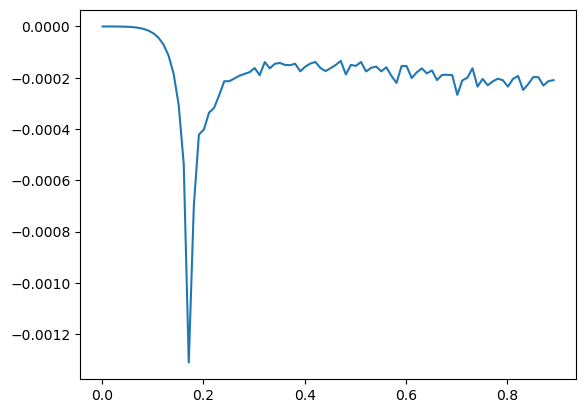

In [10]:

plt.plot(dJUs, sigma2s )

In [11]:
import cmath
import math
import scipy.integrate as spi
import scipy.special as sps
import scipy.linalg as spl
import scipy.sparse as spsp
import scipy.sparse.linalg as spspl
import scipy.optimize as spo
import time
import random
import itertools
import os
import sys
import csv

def SigmaPolaron(Epol, KXs, KYs, dkxs, dkys, uks, vks, omegaklambda, dJU, n0, UIB, cutoff, count):
    dim = M * M * (cutoff + 1)
    eta = 0.003
    eta = 0.0001
    Us, Vs, Ws, PI1100, PI1121, PI21, PI12, PI2200, PI22, inv11, inv22, inv12, T1100, T1200, T1121, T1222, T2100, T2200, T12, T22 = [np.zeros((dim, dim), dtype=np.complex128) for _ in range(20)]
    T22diag = np.zeros(dim, dtype=np.complex128)
    Sigma22 = 0
    ZeroIndx1 = True
    ZeroIndx2 = True
    for lambda_ in range(cutoff + 1):
        for lambda1 in range(cutoff + 1):
            for kx1 in range(M):
                for ky1 in range(M):
                    for qx1 in range(M):
                        for qy1 in range(M):
                            kx = kx1
                            ky = ky1
                            qx = qx1
                            qy = qy1
                            indk = lambda_ * M * M + kx * M + ky
                            indq = lambda1 * M * M + qx * M + qy
                            if lambda_ == 0 and KXs[kx] == 0 and KYs[ky] == 0 and ZeroIndx1:
                                indk0 = indk
                                ZeroIndx1 = False
                            if lambda1 == 0 and KXs[qx] == 0 and KYs[qy] == 0 and ZeroIndx2:
                                indq0 = indq
                                ZeroIndx2 = False
                            Uelem = UIB * U(kx, ky, lambda_, qx, qy, lambda1, uks, KXs, KYs, n0)
                            Velem = UIB * V(kx, ky, lambda_, qx, qy, lambda1, vks, KXs, KYs, n0)
                            Welem = UIB * (W(kx, ky, lambda_, qx, qy, lambda1, uks, vks, KXs, KYs, n0) + W(qx, qy, lambda1, kx, ky, lambda_, uks, vks, KXs, KYs, n0))
                            epsplus = epsI(KXs[kx] + KXs[qx], KYs[ky] + KYs[qy])
                            epsminus = epsI(KXs[kx] - KXs[qx], KYs[ky] - KYs[qy])
                            if lambda1 == 0:
                                epsplus = epsI(KXs[kx], KYs[ky])
                                epsminus = epsI(KXs[kx], KYs[ky])
                            if lambda_ == 0:
                                epsplus = epsI(KXs[qx], KYs[qy])
                                epsminus = epsI(-KXs[qx], -KYs[qy])
                            Den11 = Epol - omegaklambda[lambda1, qx, qy] - dJU * epsI(KXs[qx], KYs[qy]) + eta * 1j
                            Den22 = Epol - omegaklambda[lambda1, qx, qy] - dJU * epsI(KXs[qx], KYs[qy]) + eta * 1j
                            Den = Epol - omegaklambda[lambda_, kx, ky] - omegaklambda[lambda1, qx, qy] - dJU * epsplus + eta * 1j
                            Us[indk, indq] = Uelem
                            Vs[indk, indq] = Velem
                            Ws[indk, indq] = Welem
                            coeff = 1 / (4 * np.pi * np.pi) * dkxs[qx] * dkys[qy]
                            PI1100[indk, indq] = coeff * (Uelem / Den11)
                            PI1121[indk, indq] = coeff * (Uelem / Den22)
                            PI21[indk, indq] = coeff * (Welem / Den22)
                            PI2200[indk, indq] = coeff * (Welem / Den22)
                            PI12[indk, indq] = coeff * (Uelem / Den)
                            PI22[indk, indq] = coeff * (Welem / Den)
                            if lambda1 == 0:
                                PI1100[indk, indq] = 0
                                PI1121[indk, indq] = 0
                                PI21[indk, indq] = 0
                                PI12[indk, indq] = 0
                                PI2200[indk, indq] = 0
                                PI22[indk, indq] = 0
    IMat = np.eye(dim)
    inv11 = inv(IMat - PI1100)
    inv22 = inv(IMat - PI1121)
    T1100 = inv11 @ Us
    T1200 = inv11 @ Ws
    T1121 = inv22 @ Us
    T2100 = Ws + PI21 @ T1121
    T1222 = inv22 @ Ws
    T2200 = Vs + PI21 @ T1222
    inv12 = inv(IMat - PI12)
    T12 = inv12 @ Ws
    T22 = Vs + 0.5 * PI22 @ T12
    T22diag = np.diag(T22)
    for lambda_ in range(1, cutoff + 1):
        for kx in range(M):
            for ky in range(M):
                indk = lambda_ * M * M + kx * M + ky
                Sigma22 += 1.0 / (4 * np.pi * np.pi) * dkxs[kx] * dkxs[ky] * T22diag[indk]
    sigpol = T1100[indk0, indq0] + T1200[indk0, indq0] + T2100[indk0, indq0] + T2200[indk0, indq0] + Sigma22
    return np.array([np.real(Epol - sigpol), T1100[indk0, indq0], T12[indk0, indq0], T2100[indk0, indq0], T2200[indk0, indq0], Sigma22, sigpol], dtype=np.complex128)

In [12]:
dkx = dky = 2 * pi / L

KXs = KYs = np.arange(-pi, pi, dkx)
dkxs = dkys = np.ones(L) * dkx

# Trapezoidal rule
dkxs[0] = dkxs[L - 1] = dkx / 2
dkys[0] = dkys[L - 1] = dky / 2

dJUs = np.arange(0.01, 0.6, 0.01)

muU = np.sqrt(2) - 1

for count in range(1, np.size(dJUs)):

    dJU = dJUs[count]


    mat = np.zeros((N, N))
    A = np.zeros((N, N))
    B = np.zeros((N, N))
    uks = np.zeros((N, L, L, N))
    vks = np.zeros((N, L, L, N))
    omegaklambda = np.zeros((N, L, L))

    psi0 = 1

    for k in range(50000):
        for i in range(N):
            for j in range(N):
                mat[i,j] = (0.5 * i * (i - 1) - muU * i) * delta(i,j) -  dJU * np.sqrt(i) * psi0 * delta(i,j + 1) - dJU * np.sqrt(i + 1) * psi0 * (i + 1 == j)

        Eigvals, Eigvecs = np.linalg.eig(mat)
        ind = np.argmin(Eigvals)
        cns = np.real(Eigvecs[:,ind])

        psi0 = Psi0(cns)

    n0 = 0
    omega0U = 0

    for n in range(N):
        n0 = n0 + n * np.real(cns[n]) * np.real(cns[n])
        omega0U = omega0U + ( 0.5 * n * (n - 1) - muU * n)  * np.real(cns[n]) * np.real(cns[n])

    n0s[count] = n0
    omega0U = - 2 * dJU * psi0 * psi0 + omega0U


NameError: name 'pi' is not defined

In [ ]:

muU =  0.8
UIB = 0.002
dJU = 0.39 # 2 d J / U with d the dimension

Max = 100

n0s = np.zeros((Max, Max))
sigma0s = np.zeros(Max)
sigma1s = np.zeros(Max)
sigma2s = np.zeros(Max)
sigmapols = np.zeros(Max)
T11s = np.zeros(Max)
T12s = np.zeros(Max)
T21s = np.zeros(Max)
T2200s = np.zeros(Max)
T22s = np.zeros(Max)

Epol = 0.14
cutoff = 2

for count in range(12, 24):
    Dir = ""
    dash = "-"
    s1 = ""
    s2 = ""
    ext = ""
    oss = Dir + str(count) + dash + s1 + dash + s2 + ext
    var = oss
    myfile = open(var, "w")
    
    dJU = count / Max
    dJU = dJUs[count]
    muU = muUs[count]

    mat = np.zeros((N, N))
    A = np.zeros((N, N))
    B = np.zeros((N, N))
    uks = np.zeros((N, M, M, N))
    vks = np.zeros((N, M, M, N))
    omegaklambda = np.zeros((N, M, M))

    psi0 = 1

    for k in range(50000):
        for i in range(N):
            for j in range(N):
                Mat[i,j] = (0.5 * i * (i - 1) - muU * i) * (i == j) -  dJU * np.sqrt(i) * psi0 * (i == j + 1) - dJU * np.sqrt(i + 1) * psi0 * (i + 1 == j)

        Eigvals, Eigvecs = np.linalg.eig(Mat)
        ind = np.argmin(np.real(Eigvals))
        cns = np.abs(np.real(Eigvecs[:,ind]))

        psi0 = Psi0(cns)

    n0 = 0
    omega0U = 0

    for n in range(N):
        n0 = n0 + n * np.real(cns[n]) * np.real(cns[n])
        omega0U = omega0U + ( 0.5 * n * (n - 1) - muU * n)  * np.real(cns[n]) * np.real(cns[n])

    n0s[count] = n0
    omega0U = - 2 * dJU * psi0 * psi0 + omega0U

    for kx in range(M):
        for ky in range(M):
            x = epsI( KXs[kx], KYs[ky] )
            for n in range(N):
                for m in range(N):
                    A[n,m] = ( 0.5 * n * (n - 1) - muU * n - omega0U) * (n == m) -  JkU(dJU, 0) * psi0 * ( np.sqrt(n) * (n == m + 1) + np.sqrt(m) * (n + 1 == m) )- JkU(dJU, x) * ( np.sqrt(n) * np.sqrt(m) * cn( cns , m - 1 ) * cn( cns , n - 1 ) + np.sqrt(n + 1) * np.sqrt(m + 1) * cn( cns , m + 1 ) * cn( cns , n + 1 ) )
                    B[n,m] = - JkU(dJU, x) * ( np.sqrt(n) * np.sqrt(m + 1) * cn( cns , m + 1 ) * cn( cns , n - 1 ) + np.sqrt(n + 1) * np.sqrt(m) * cn( cns , m - 1 ) * cn( cns , n + 1 ) )

            AB = np.concatenate((A,B), axis=1)
            BA = np.concatenate((-B,-A), axis=1)
            MatAB = np.concatenate((AB,BA), axis=0)
            Eigvals, Eigvecs = np.linalg.eig(MatAB)
            omega00 = np.sort(np.real(Eigvals))
            omega0 = omega00[N:2*N]

            for lambda_ in range(N):
                omegaklambda[lambda_][kx][ky]= omega0[lambda_]
                doublezero = False
                if (lambda_ == 0):
                    ind = np.where(np.floor(10 * np.abs(np.real(Eigvals))) == np.floor(10 * np.abs(omega0[lambda_])) )

                    if (ind[0].size > 2):
                        doublezero = True

                    for n in range(N):
                        uks[n][kx][ky][lambda_] = cns[n]
                        vks[n][kx][ky][lambda_] = 0
                    omegaklambda[lambda_][kx][ky] = 0

                else:
                    ind = np.where(np.real(Eigvals) == omega0[lambda_])

                    ind1 = ind[0][0]

                    if (ind[0].size > 1):
                        ind1 = ind[0][1]
                    Norm = 0

                    for n in range(N):
                        Norm = Norm + pow(  np.real(Eigvecs[n, ind1]), 2 )  - pow( np.real(Eigvecs[N + n, ind1]) , 2 )
                    for n in range(N):
                        uks[n][kx][ky][lambda_] = np.real(Eigvecs[n, ind1]) / np.sqrt(Norm)
                        vks[n][kx][ky][lambda_] = np.real(Eigvecs[N + n, ind1]) / np.sqrt(Norm)

